In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.utils.multiclass import type_of_target
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
tr=pd.read_csv("SalaryData_Train.csv")
tr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
te=pd.read_csv("SalaryData_Test.csv")
te

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
tr['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
print('Aefore droping duplictes',tr.shape)
print('Before droping duplictes',te.shape)

Aefore droping duplictes (30161, 14)
Before droping duplictes (15060, 14)


In [8]:
tr.drop_duplicates(keep=False,inplace=True)
te.drop_duplicates(keep=False,inplace=True)

In [9]:
print('After dropping duplicates',tr.shape)
print('After dropping duplicates',te.shape)

After dropping duplicates (24943, 14)
After dropping duplicates (13450, 14)


In [10]:
tr.drop('native',axis=1,inplace=True)
te.drop('native',axis=1,inplace=True)

In [11]:
tr.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K


In [12]:
te.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K


# Label Encoding Categorical Columns of train and test dataset

In [13]:
fe=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']

LE=preprocessing.LabelEncoder()
for col in fe:
    
    tr[col]=LE.fit_transform(tr[col])
    te[col]=LE.fit_transform(te[col])
    print(LE.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [14]:
tr.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [15]:
te.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [16]:
tr['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

In [17]:
print('% of data labelled as 0:',((tr['Salary']==0).sum()/len(tr)*100))
print('% of data labelled as 1:',((tr['Salary']==1).sum()/len(tr)*100))

% of data labelled as 0: 74.1129775889027
% of data labelled as 1: 25.887022411097306


# Feature selection on train dataset using ExtraTreesClassifier

In [18]:
X=tr.iloc[:,:-1]
Y=tr.iloc[:,-1]

In [19]:
type_of_target(Y)

'binary'

In [20]:
mod=ExtraTreesClassifier(n_estimators=11)
mod.fit(X,Y)
print(mod.feature_importances_)

[0.22609112 0.05321117 0.0346265  0.08359602 0.08584912 0.09118258
 0.08094246 0.02118573 0.04257336 0.11972427 0.03608929 0.12492838]


In [21]:
tr.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [22]:
FE=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
fe_imp=pd.Series(mod.feature_importances_,index=FE).sort_values(ascending=False)
fe_imp

age              0.226091
hoursperweek     0.124928
capitalgain      0.119724
occupation       0.091183
maritalstatus    0.085849
educationno      0.083596
relationship     0.080942
workclass        0.053211
sex              0.042573
capitalloss      0.036089
education        0.034627
race             0.021186
dtype: float64

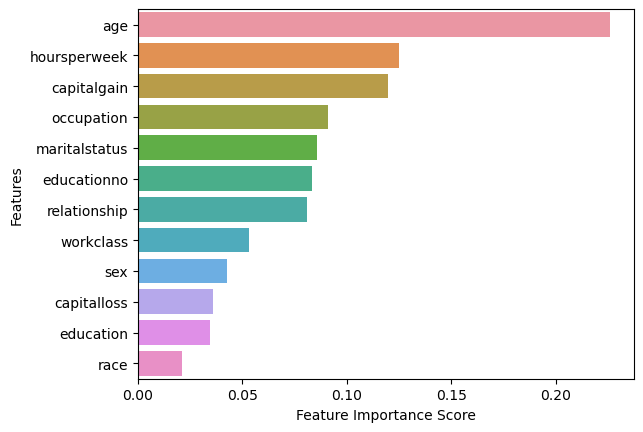

In [23]:
sns.barplot(x=fe_imp,y=fe_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [24]:
tr.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [25]:
te.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [26]:
tr

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0
...,...,...,...,...,...,...,...,...
30154,53,14,2,3,0,0,40,1
30155,22,10,4,10,1,0,40,0
30156,27,12,2,12,5,0,38,0
30158,58,9,6,0,4,0,40,0


In [27]:
te

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,9,3,0,40,0
15056,39,13,0,9,1,0,36,0
15057,38,13,2,9,0,0,50,0
15058,44,13,0,0,3,5455,40,0


In [28]:
tr[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,24943.000000,24943.000000,24943.000000
mean,39.433909,1302.317724,41.283045
std,13.218143,8071.604978,12.592211
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,46.000000
max,90.000000,99999.000000,99.000000


In [29]:
#plt.figure(figsize=(10,10))
#plt.bar(tr['age'],tr['capitalgain'],tr['hoursperweek'],color='yellow')
#plt.show()

In [30]:
#plt.figure(figsize=(10,10))
#plt.bar(te['age'],te['capitalgain'],te['hoursperweek'],color='red')
#plt.show()

In [31]:
te[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


# IN THE THIS STEP 

fitting the train data 

Transforming thr train data

transforming the test data


In [32]:
sc=StandardScaler()
sc.fit(te[['age','capitalgain','hoursperweek']])

tr[['age','capitalgain','hoursperweek']]=sc.transform(tr[['age','capitalgain','hoursperweek']])
te[['age','capitalgain','hoursperweek']]=sc.transform(te[['age','capitalgain','hoursperweek']])

In [33]:
tr.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.034067,13,4,0,1,0.116354,-0.093292,0
1,0.783480,13,2,3,0,-0.153696,-2.267682,0
2,-0.108389,9,0,5,1,-0.153696,-0.093292,0
3,1.006448,7,2,5,0,-0.153696,-0.093292,0
4,-0.851614,13,2,9,5,-0.153696,-0.093292,0


In [34]:
te.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.074581,7,4,6,3,-0.153696,-0.093292,0
1,-0.108389,9,2,4,0,-0.153696,0.712037,0
2,-0.851614,12,2,10,0,-0.153696,-0.093292,1
3,0.337546,10,2,6,0,0.801292,-0.093292,1
4,-0.405679,6,4,7,1,-0.153696,-0.898622,0


In [35]:
tr['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

# BULDING THE NAIVE BAYES MODEL

In [36]:
x_train=tr.iloc[:,:-1]
y_train=tr.iloc[:,-1]

In [37]:
x_test=te.iloc[:,:-1]
y_test=te.iloc[:,-1]

In [38]:
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB()

In [39]:
y_pred = gn.predict(x_test)


In [40]:
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[9839,  254],
       [2581,  776]], dtype=int64)

Text(20.72222222222222, 0.5, 'True class')

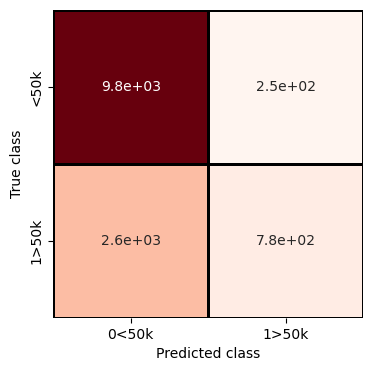

In [41]:
fig,an=plt.subplots(1,1,figsize=(4,4),dpi=100)

xlabels=['0<50k','1>50k']
ylabels=['<50k','1>50k']

sns.heatmap(cm1,annot=True,cbar=None,cmap="Reds",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
an.set_xlabel('Predicted class')
an.set_ylabel('True class')


In [42]:
names=['0,50k','1>50k']
print(classification_report(y_test,y_pred,target_names=names))

              precision    recall  f1-score   support

       0,50k       0.79      0.97      0.87     10093
       1>50k       0.75      0.23      0.35      3357

    accuracy                           0.79     13450
   macro avg       0.77      0.60      0.61     13450
weighted avg       0.78      0.79      0.74     13450

